# Image processing examples 

In this section, we will learn how to do image classification using dataset MNIST. MNIST consists of 70,000 samples of digits 0 to 9 and their labels. First, we load the dataset and do some visualization on it.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
print("Fetching data from openml database,it might take a while based on your internet connection")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape)
y=y.astype('int')

Fetching data from openml database,it might take a while based on your internet connection
(70000, 784)


##### We visualize the MNIST dataset as following

The size of images is 28x28, so if we flat images to vectors, they will be 784-dimensional vectors.

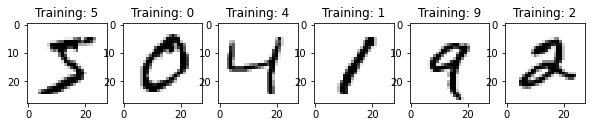

In [3]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))

for ax, image, label in zip(axes, X, y):
    image=np.resize(image,(28,28))
    #ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


In [4]:
# Split data into 60,000 train and 10,000 test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, shuffle=True)
print(f'Train sample shape {X_train.shape}, targets shape {y_train.shape}')
print(f'Test sample shape {X_test.shape}, targets shape {y_test.shape}')

Train sample shape (60000, 784), targets shape (60000,)
Test sample shape (10000, 784), targets shape (10000,)


##### Classification on MNIST data

Now, we will create a classification model and fit our training data

In [5]:
### Create a multinomial logistic regression model which can be used in classification problem
print("Training the model,it might take a while based on the tolerance level (tol, if it small, the training will be slow but result will be better)")
clf = LogisticRegression(solver='saga',tol=0.01)
clf.fit(X_train,y_train)

Training the model,it might take a while based on the tolerance level (tol, if it small, the training will be slow but result will be better)


LogisticRegression(solver='saga', tol=0.01)

In [6]:
pred=clf.predict(X_test)
print(pred)

[4 5 9 ... 0 3 6]


In [7]:
from sklearn import metrics
print(metrics.accuracy_score(pred,y_test))
print(clf.score(X_test, y_test))

0.9184
0.9184


Moreover, using *StandardScaler*, we apply z-score normalization on the training and testing dataset. The following codes also train a multinomial logistic regression model. 

In [8]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [ ]:
print("Training the model,it might take a while based on the tolerance level (tol, if it small, the training will be slow but result will be better)")
clf_new = LogisticRegression(solver='saga',tol=0.01)
clf_new.fit(X_train_new,y_train)

Training the model,it might take a while based on the tolerance level (tol, if it small, the training will be slow but result will be better)


In [ ]:
pred_new=clf_new.predict(X_test_new)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(pred_new,y_test))
print(clf_new.score(X_test_new, y_test))

### scikit-learn guide

##### supervised learning models and examples
https://scikit-learn.org/stable/supervised_learning.html

##### unsupervised learning models and examples
https://scikit-learn.org/stable/unsupervised_learning.html

##### Evaluation metrics
https://scikit-learn.org/stable/modules/model_evaluation.html